In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("glass.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)


In [3]:
df.dtypes

1            int64
1.52101    float64
13.64      float64
4.49       float64
1.10       float64
71.78      float64
0.06       float64
8.75       float64
0.00       float64
0.00.1     float64
1.1          int64
dtype: object

In [4]:
df.columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

In [5]:
df=df.rename(columns={'1':'id number', '1.52101':'RI', '13.64':'Na', '4.49':'Mg', '1.10':'Al', '71.78':'Si', '0.06':'K', '8.75':'Ca',
       '0.00':'Ba', '0.00.1':'Fe', '1.1':'Type'})

In [6]:
df

,id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [7]:
# drop id number
df.drop(['id number'],inplace=True,axis=1)

In [8]:
df.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0.0,0.0,1


In [9]:
df.shape

(213, 10)

In [10]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [11]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [12]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Independent Variable

1.RI-->Refractive index

2.Na-->Sodium

3.Mg-->Magnesium

4.Al-->Aluminium

5.si-->Silicon

6.K-->Potassium

7.Ca-->Calcium

8.Ba-->Barium

9.Fe-->Iron



# Dependent Variable(Target)

1.Type(Types of glass)

In [14]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [15]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

There are seven classes

In [16]:
df['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Type 2 and Type 1 has high value counts

In [17]:
# five point summary
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [18]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
Type,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


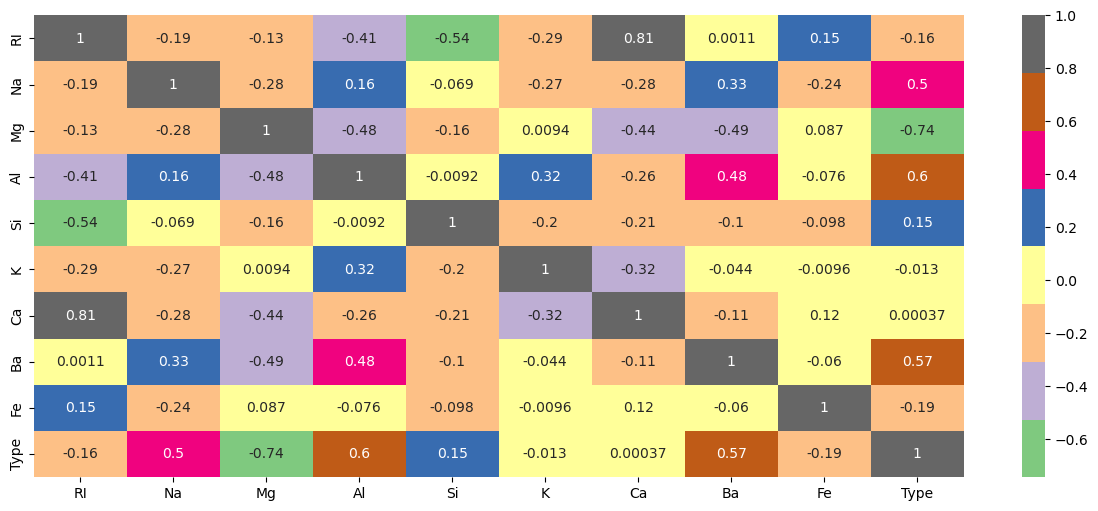

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap='Accent')
plt.show()

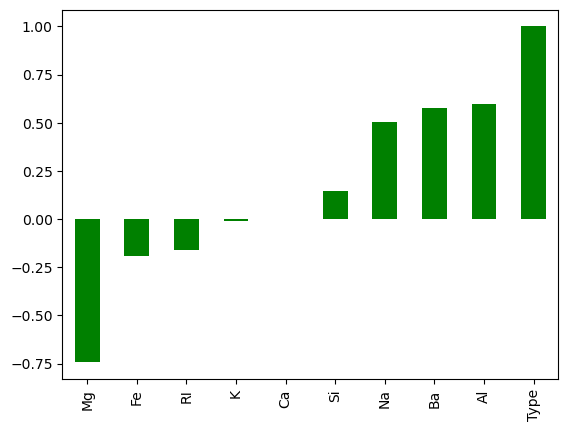

In [20]:
df.corr()['Type'].sort_values().plot(kind='bar',color='g')
plt.show()

"Mg","Fe","Ri" are negatively correlated

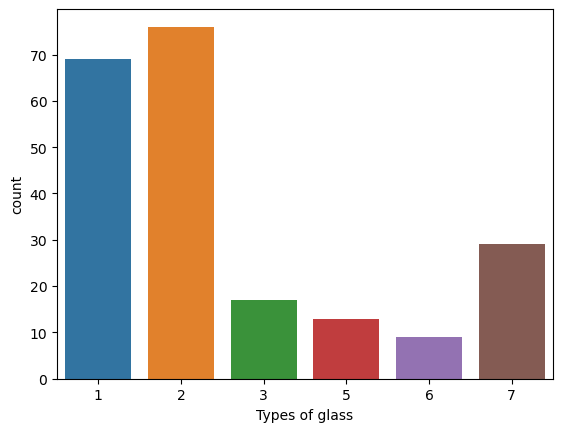

In [21]:
sns.countplot(df['Type'])
plt.xlabel("Types of glass")
plt.show()

Glass 1 and Glass 2 have high value as compared to other

•	1- building_windows_float_processed

•	2- building_windows_non_float_processed

•	3- vehicle_windows_float_processed

•	4- vehicle_windows_non_float_processed (none in this database)

•	5- containers

•	6- tableware

•	7- headlamps

The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


<AxesSubplot:xlabel='Type', ylabel='count'>

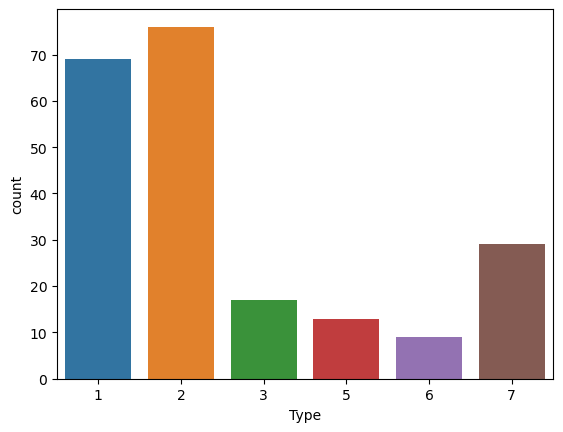

In [22]:
sns.countplot(df['Type'])

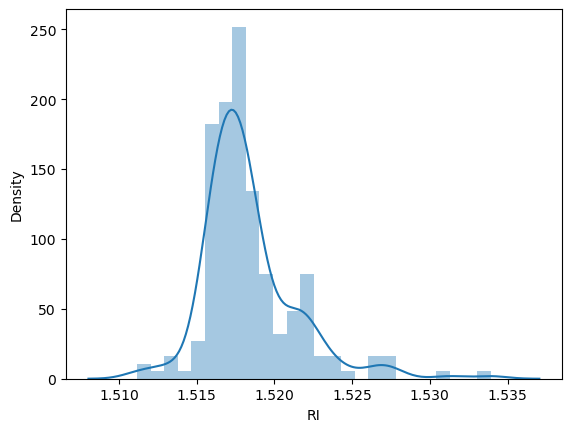

In [23]:
sns.distplot(df['RI'])
plt.show()

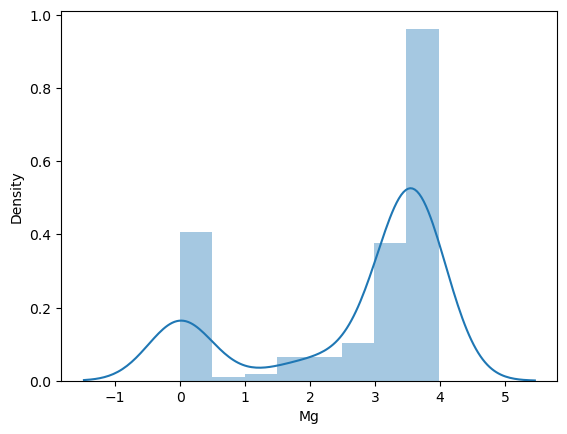

In [24]:
sns.distplot(df['Mg'])
plt.show()

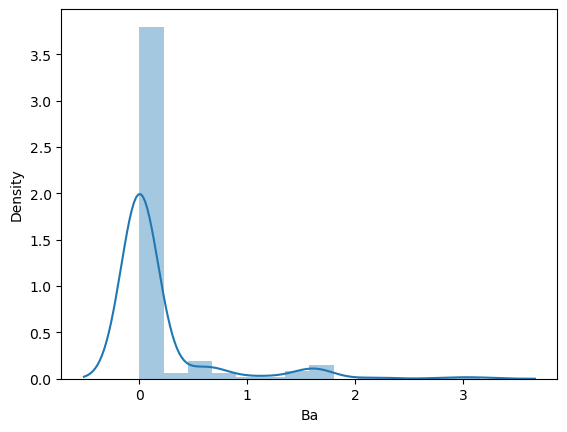

In [25]:
sns.distplot(df['Ba'])
plt.show()

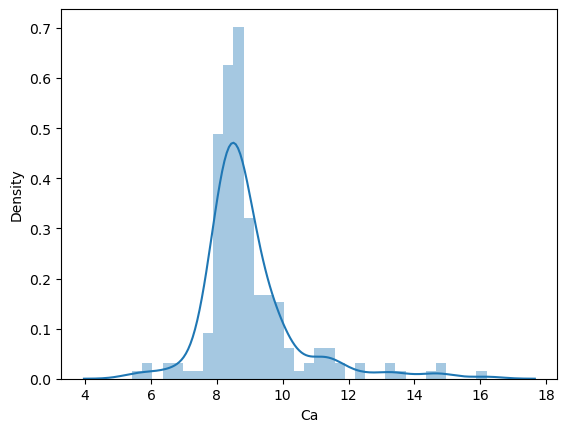

In [26]:
sns.distplot(df['Ca'])
plt.show()

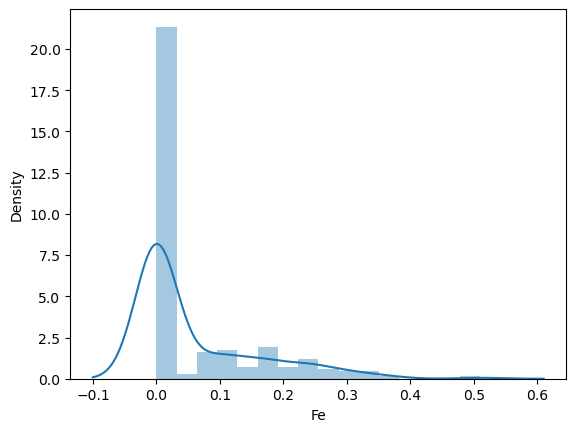

In [27]:
sns.distplot(df['Fe'])
plt.show()

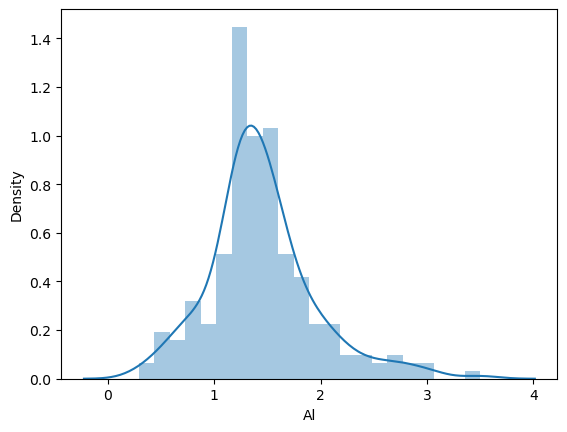

In [28]:
sns.distplot(df['Al'])
plt.show()

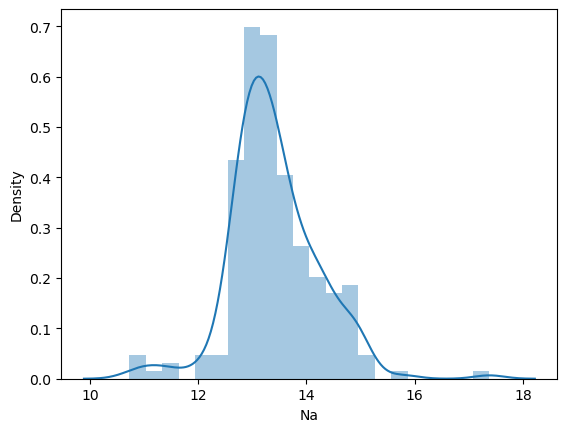

In [29]:
sns.distplot(df['Na'])
plt.show()

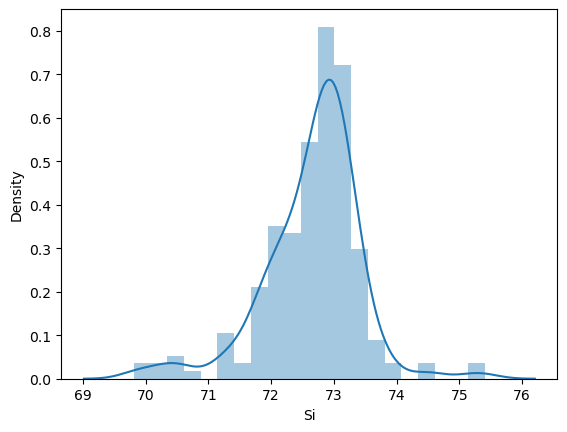

In [30]:
sns.distplot(df['Si'])
plt.show()

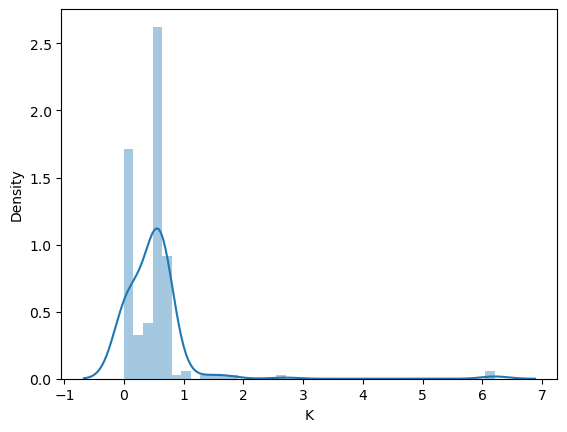

In [31]:
sns.distplot(df['K'])
plt.show()

data is skewed

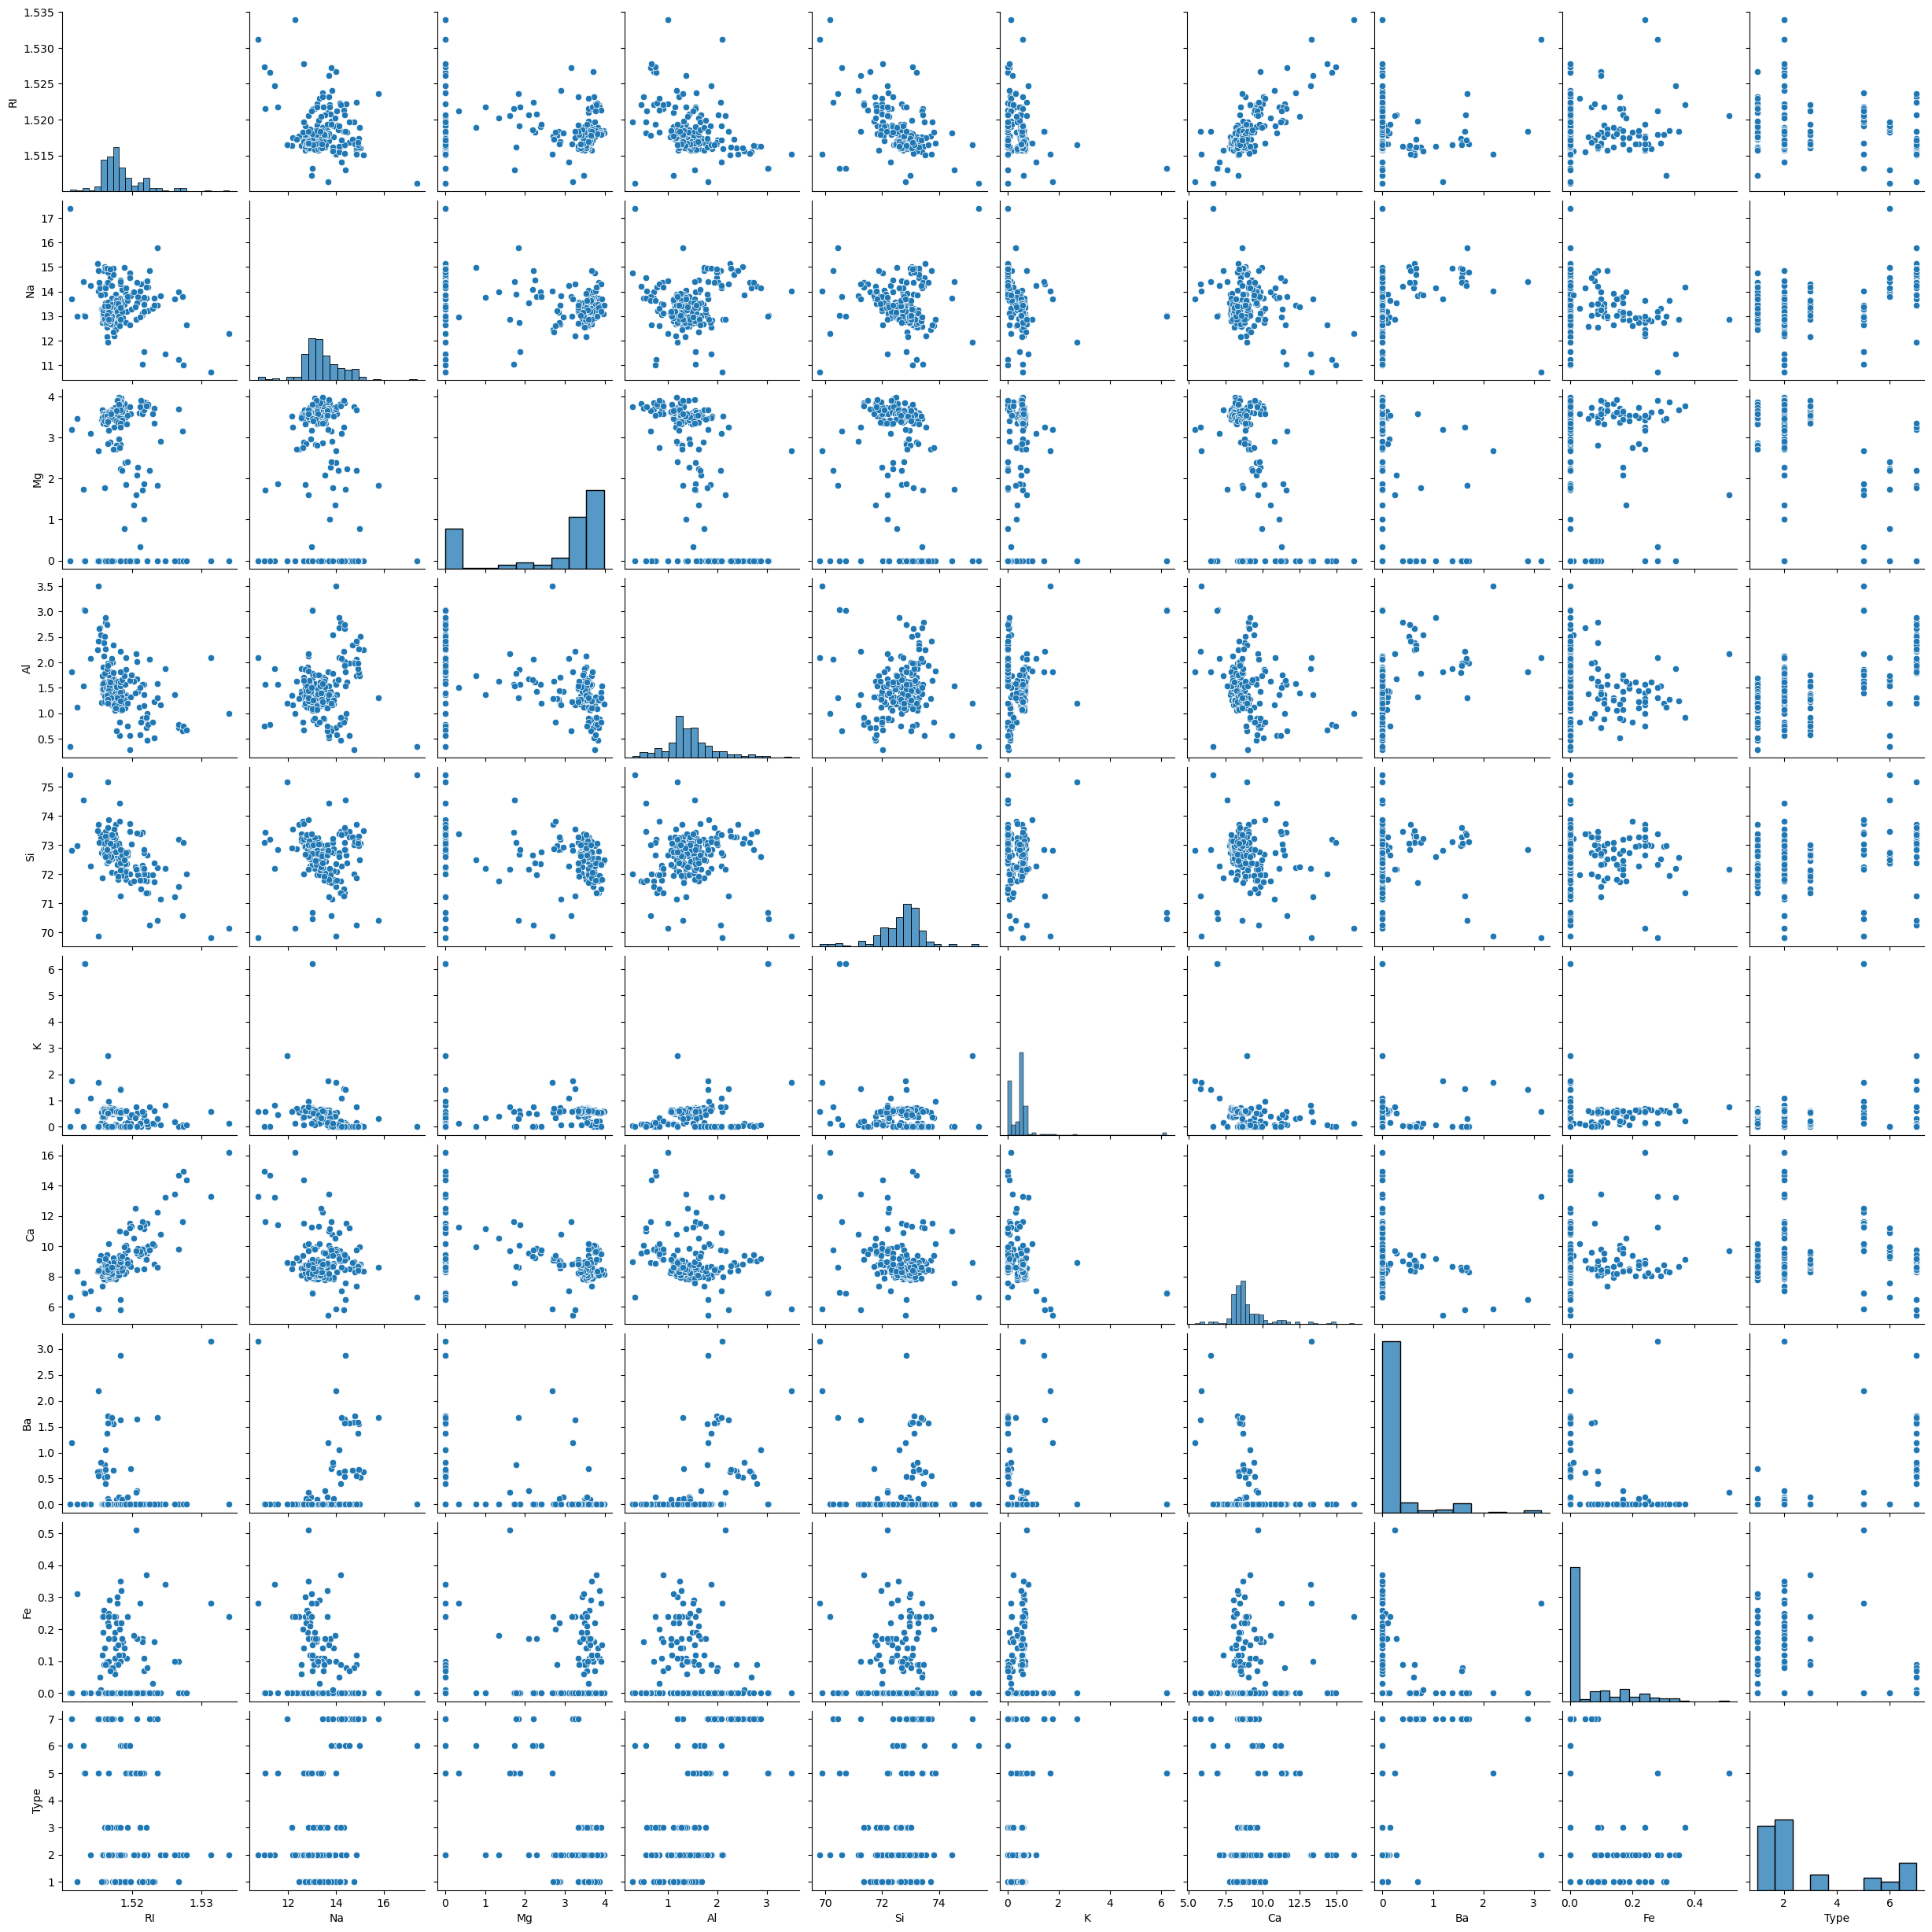

In [32]:
sns.pairplot(df)
plt.show()

# Bivariant analysis

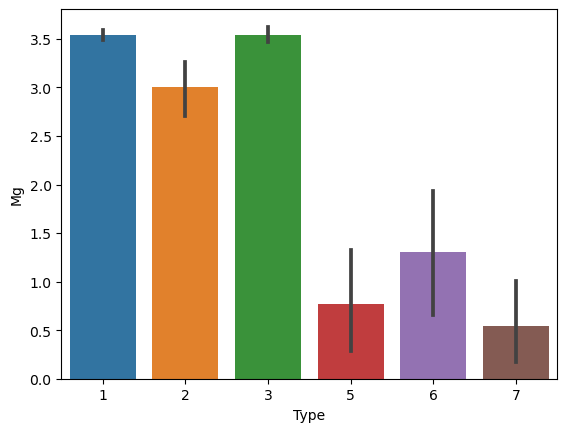

In [33]:
sns.barplot(x='Type',y='Mg',data=df)
plt.show()

we have mentioned above data is divided into class

1-3--> window glass

5-7-->non-window glass

so "1-3" types of glasses have "high Mg value" and "5-7" have "low Mg value" in comparison to 1-3

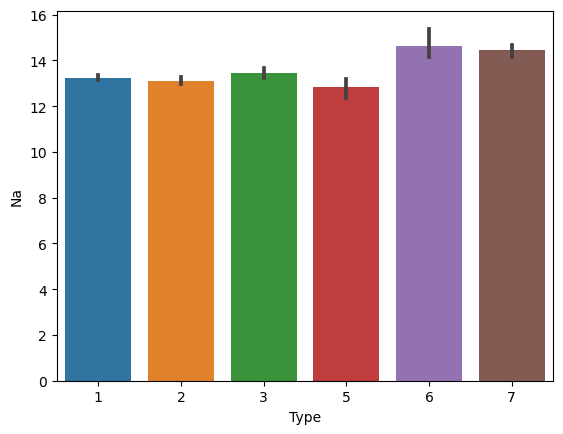

In [34]:
sns.barplot(x='Type',y='Na',data=df)
plt.show()

Na is higher in 6 and 7 types of glass

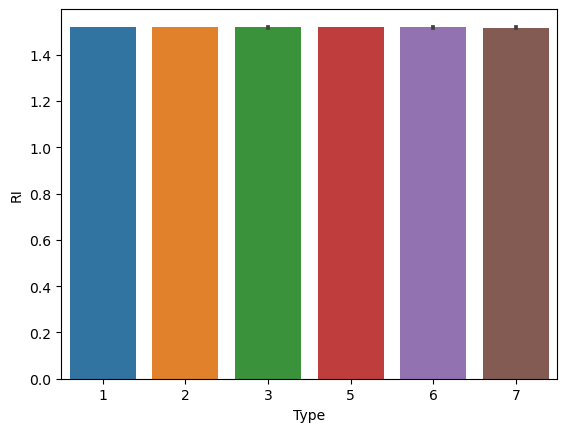

In [35]:
sns.barplot(x='Type',y='RI',data=df)
plt.show()

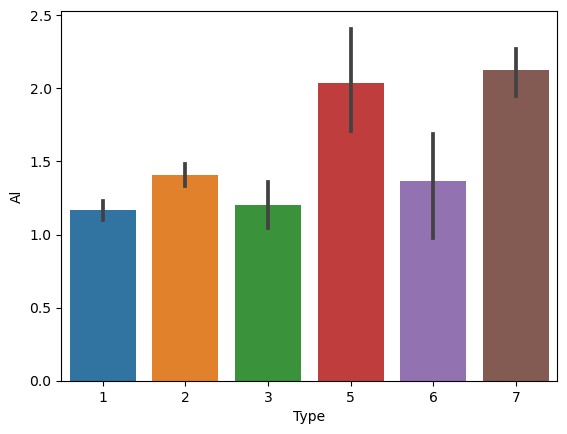

In [36]:
sns.barplot(x='Type',y='Al',data=df)
plt.show()

Al is high in non window glass

<AxesSubplot:xlabel='Type', ylabel='K'>

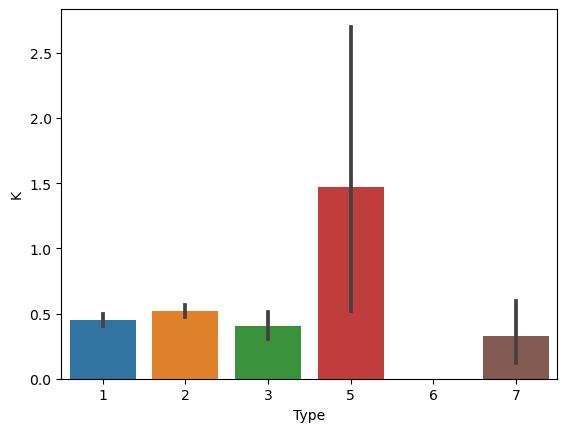

In [37]:
sns.barplot(x='Type',y='K',data=df)

In [38]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

<AxesSubplot:xlabel='Type', ylabel='Fe'>

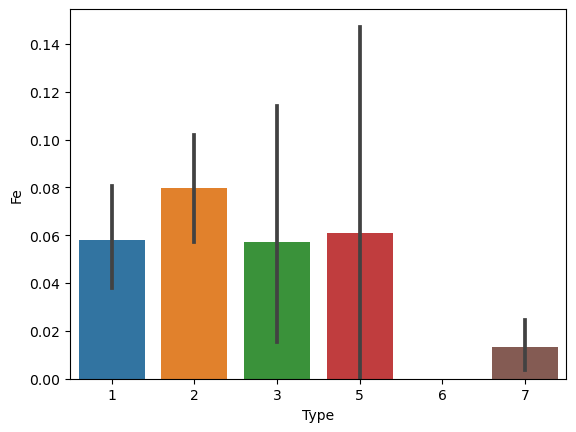

In [39]:
sns.barplot(x='Type',y='Fe',data=df)

<AxesSubplot:xlabel='Type', ylabel='Si'>

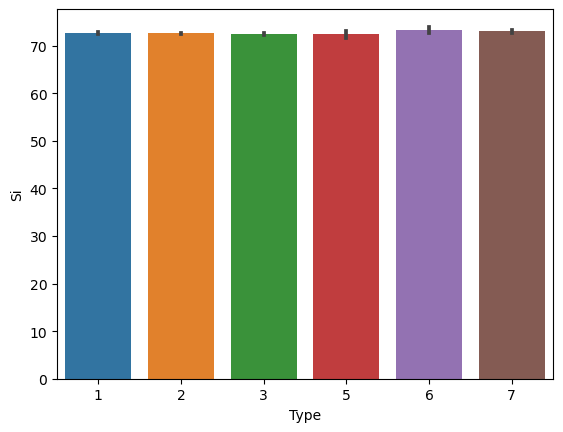

In [40]:
sns.barplot(x='Type',y='Si',data=df)

si is equal in both type of glasses

<AxesSubplot:xlabel='Type', ylabel='Ca'>

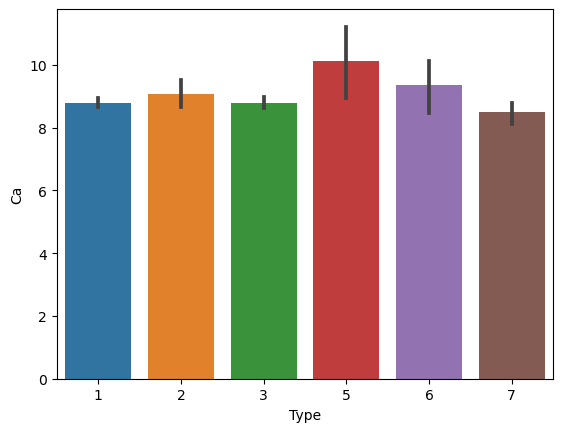

In [41]:
sns.barplot(x='Type',y='Ca',data=df)

Ca is high in non window glass as compare to window glass

<AxesSubplot:xlabel='Type', ylabel='Ba'>

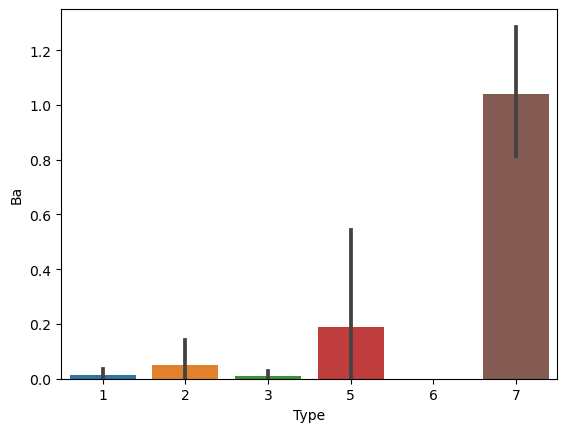

In [42]:
sns.barplot(x='Type',y='Ba',data=df)

Ba is high in non window glass

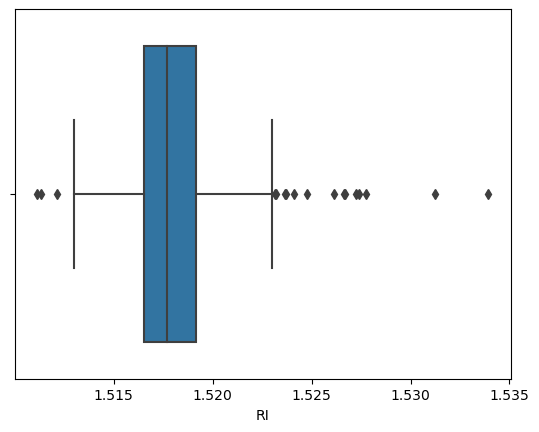

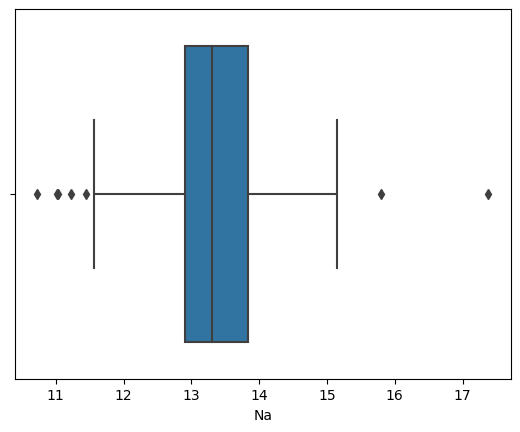

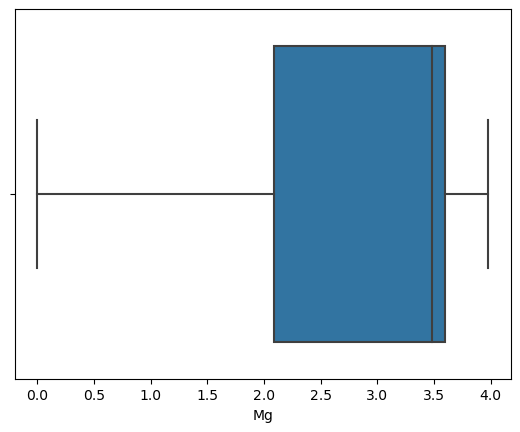

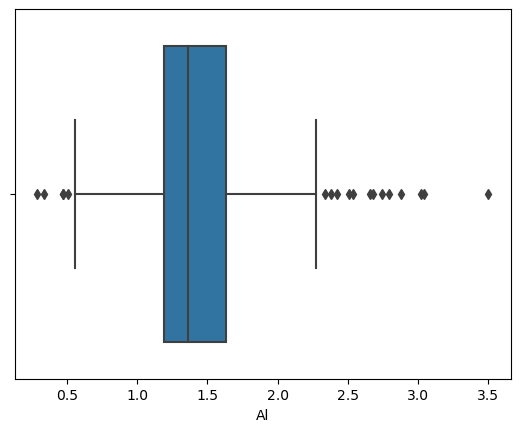

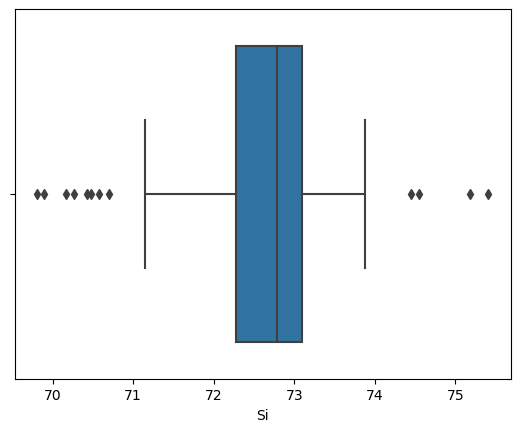

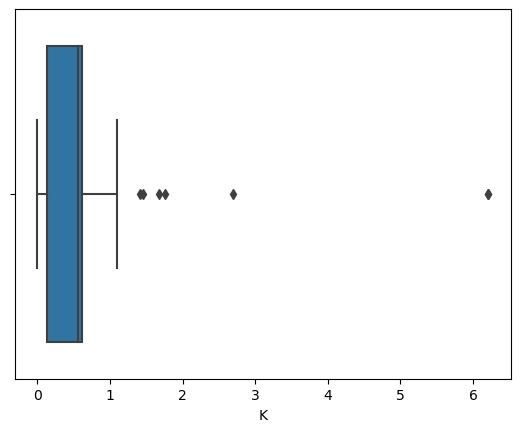

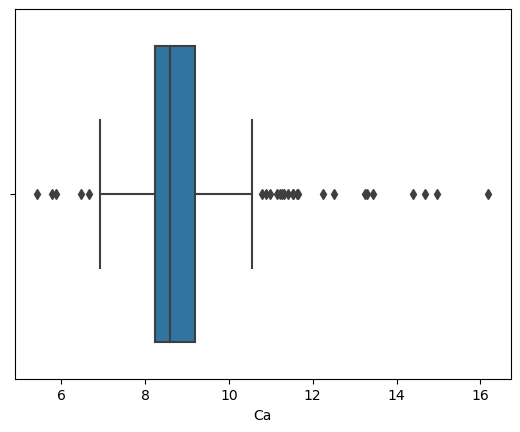

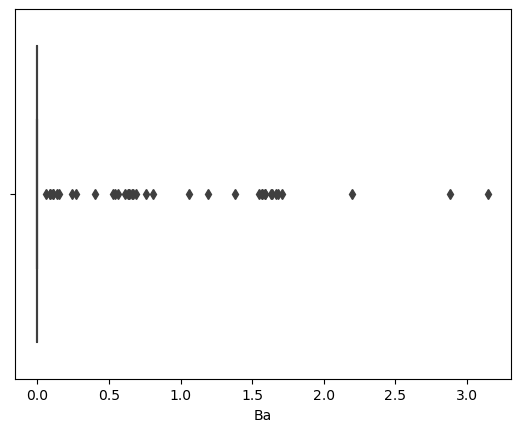

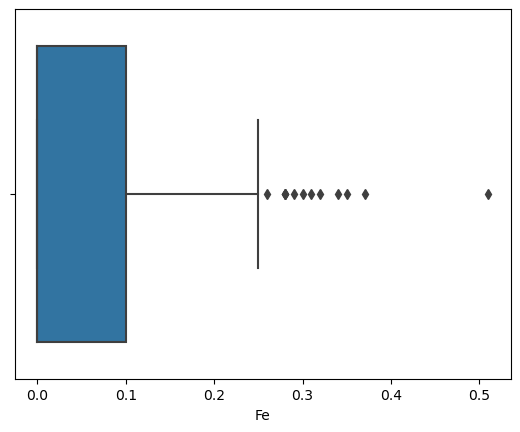

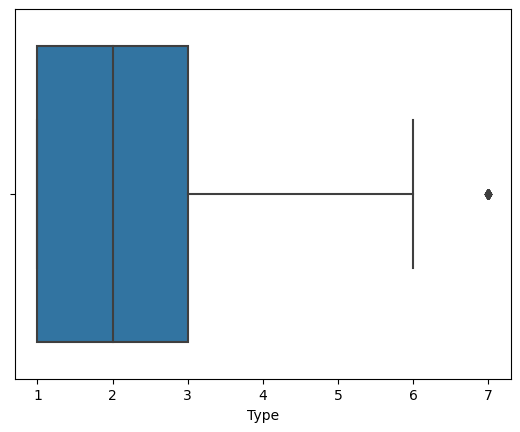

In [43]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [44]:
df.skew()

RI      1.639658
Na      0.457318
Mg     -1.154323
Al      0.900017
Si     -0.744546
K       6.549276
Ca      2.040591
Ba      3.406749
Fe      1.747173
Type    1.108861
dtype: float64

0.5 to + 0.5 the distribution of the values is almost symetrical

if its between 0.5 to 1 the data is positivelt skewed or skewness is moderate

but if the skewness is lower than -1 means highly negatively skewed and if greater than +1 means highly positively skewe

In [45]:
 #encoded the value of type
# we get divided the type of glass into two binary value 0 and 1

# type(1-4)--->1  means "window glass"
#type(5-7)--->0   means "Non-window glass"
df['Type']=[1 if x<=4 else 0 for x in df['Type']]

<AxesSubplot:xlabel='Type', ylabel='count'>

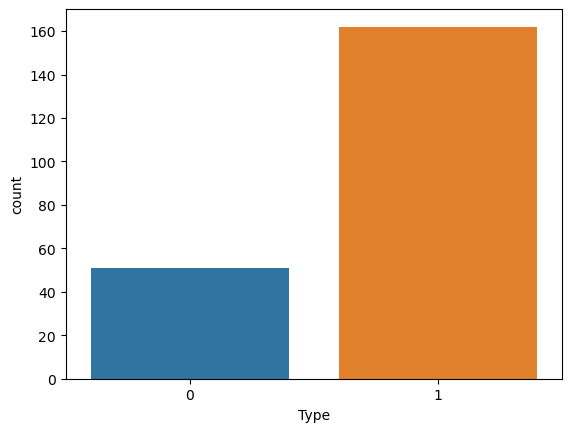

In [46]:
sns.countplot(df['Type'])

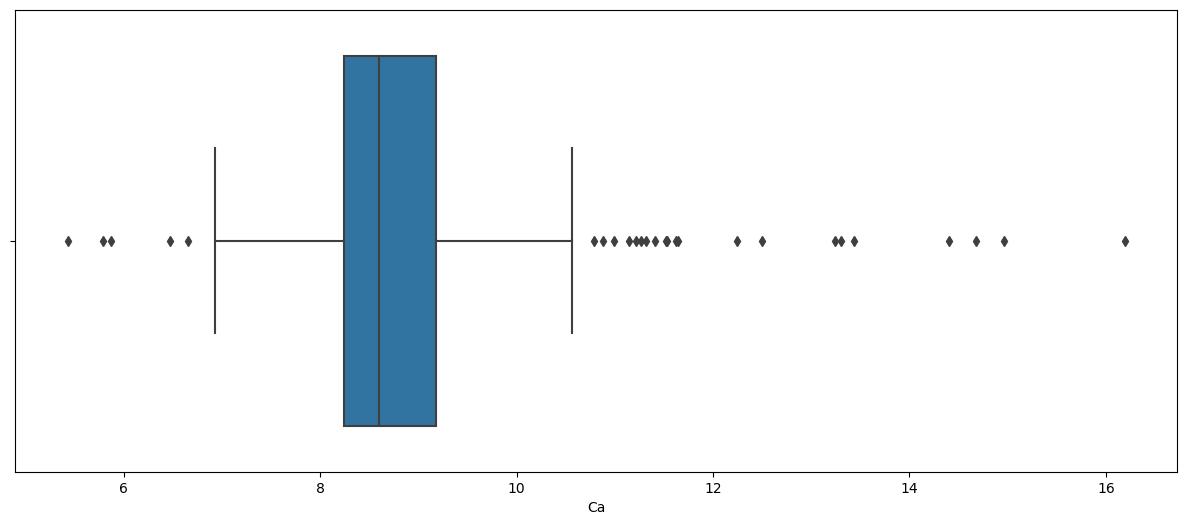

In [47]:
plt.figure(figsize=(15,6))
sns.boxplot(df['Ca'])
plt.show()

# handling outliers 



In [48]:

def outliers(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    ls=data.index[(data[col]<lower_bound)|(data[col]>upper_bound)]
    
    return ls


In [49]:

index_list=[]
for column in ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']:
    index_list.extend(outliers(df,df.columns[0]))
    

In [50]:
index_list

[46,
 49,
 55,
 102,
 103,
 104,
 105,
 106,
 109,
 110,
 111,
 130,
 169,
 183,
 184,
 186,
 188,
 46,
 49,
 55,
 102,
 103,
 104,
 105,
 106,
 109,
 110,
 111,
 130,
 169,
 183,
 184,
 186,
 188,
 46,
 49,
 55,
 102,
 103,
 104,
 105,
 106,
 109,
 110,
 111,
 130,
 169,
 183,
 184,
 186,
 188,
 46,
 49,
 55,
 102,
 103,
 104,
 105,
 106,
 109,
 110,
 111,
 130,
 169,
 183,
 184,
 186,
 188,
 46,
 49,
 55,
 102,
 103,
 104,
 105,
 106,
 109,
 110,
 111,
 130,
 169,
 183,
 184,
 186,
 188,
 46,
 49,
 55,
 102,
 103,
 104,
 105,
 106,
 109,
 110,
 111,
 130,
 169,
 183,
 184,
 186,
 188,
 46,
 49,
 55,
 102,
 103,
 104,
 105,
 106,
 109,
 110,
 111,
 130,
 169,
 183,
 184,
 186,
 188,
 46,
 49,
 55,
 102,
 103,
 104,
 105,
 106,
 109,
 110,
 111,
 130,
 169,
 183,
 184,
 186,
 188,
 46,
 49,
 55,
 102,
 103,
 104,
 105,
 106,
 109,
 110,
 111,
 130,
 169,
 183,
 184,
 186,
 188]

In [51]:
# Finding outliers
def outliers(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    ls=data[(data[col]<lower_bound)|(data[col]>upper_bound)]
    
    return ls

In [52]:

for column in ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type']:
    (outliers(df,df.columns[0]))
    

In [53]:
print(outliers(df,df.columns[0]))

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
46   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10     1
49   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.00  0.16     1
55   1.51215  12.99  3.47  1.12  72.98  0.62   8.35  0.00  0.31     1
102  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00     1
103  1.52410  13.83  2.90  1.17  71.15  0.08  10.79  0.00  0.00     1
104  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34     1
105  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     1
106  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24     1
109  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00     1
110  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00     1
111  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00     1
130  1.52614  13.70  0.00  1.36  71.24  0.19  13.44  0.00  0.10     1
169  1.52369  13.44  0.00  1.58  72.22  0.32  12.24  0.00  0.00     0
183  1.51115  17.38 

In [54]:
# removing outliers
def remove(data,ls):
    ls=sorted(set(ls))
    data=data.drop(ls)
    return data


In [55]:
df1=remove(df,index_list)

In [56]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,0
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,0
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,0
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,0


# visualising the data after removing outliers by distplot

<AxesSubplot:xlabel='RI', ylabel='Density'>

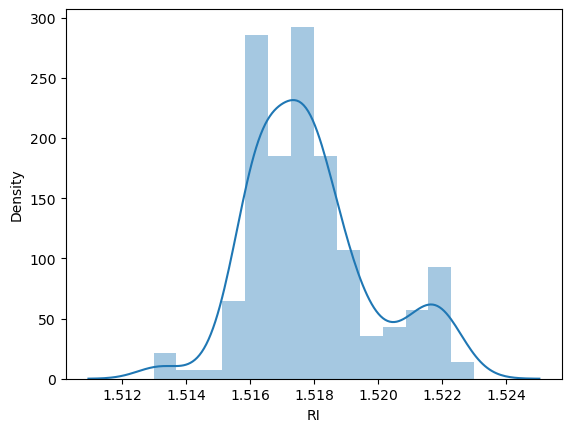

In [57]:
sns.distplot(df1['RI'])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

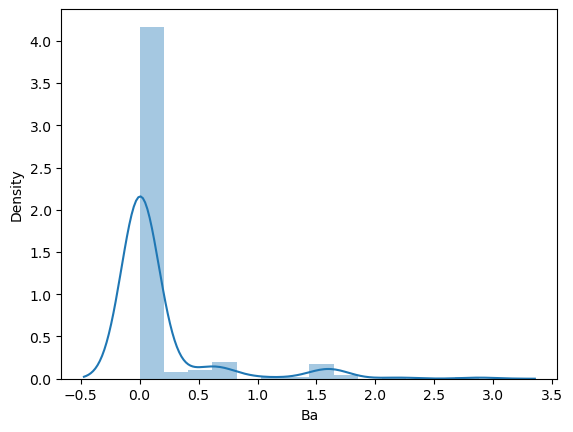

In [58]:
sns.distplot(df1['Ba'])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

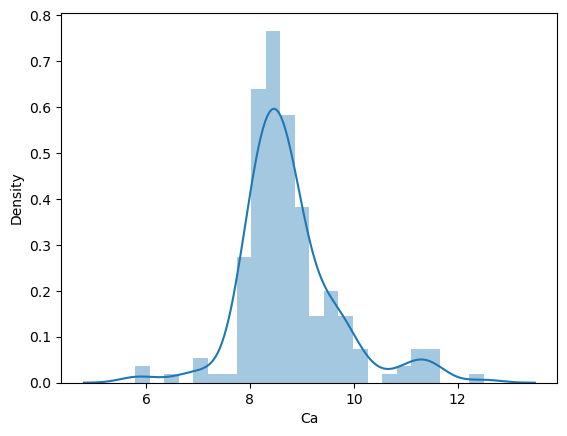

In [59]:
sns.distplot(df1['Ca'])

<AxesSubplot:xlabel='Mg', ylabel='Density'>

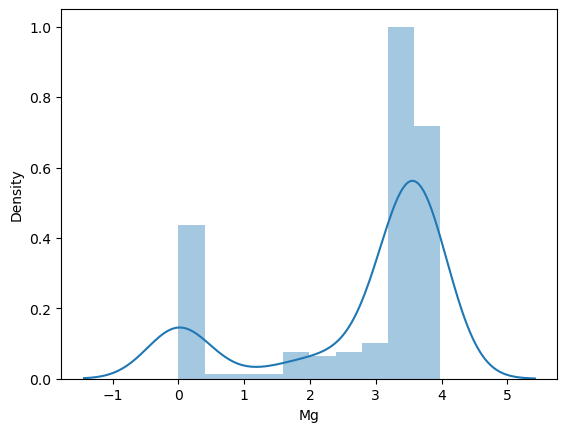

In [60]:
sns.distplot(df1['Mg'])

<AxesSubplot:xlabel='Si', ylabel='Density'>

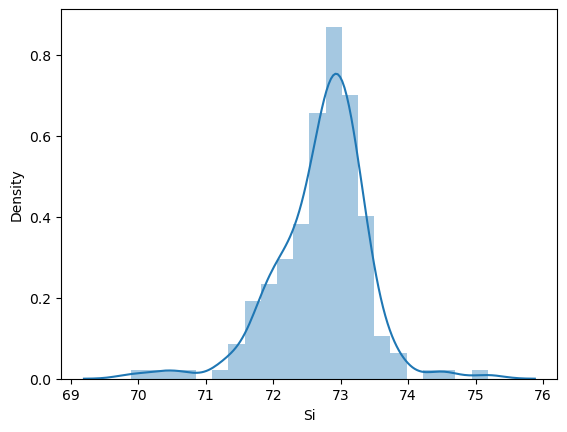

In [61]:
sns.distplot(df1['Si'])

<AxesSubplot:xlabel='K', ylabel='Density'>

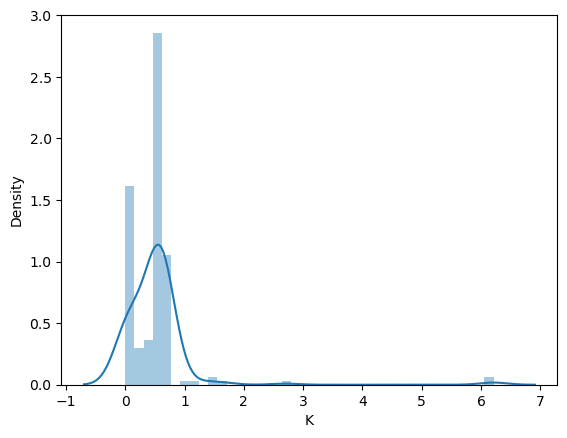

In [62]:
sns.distplot(df1['K'])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

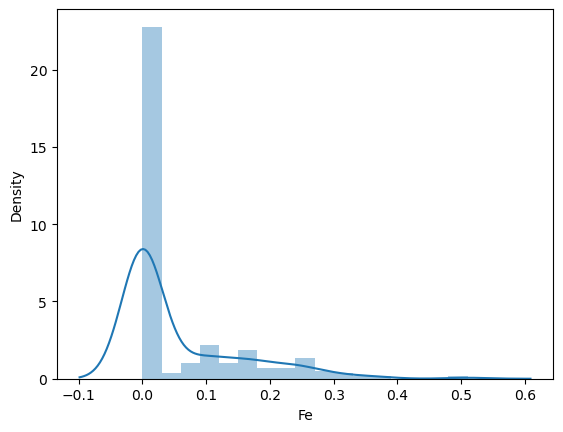

In [63]:
sns.distplot(df1['Fe'])

We can compare the oucomes after removing the outliers skewness is reduced

In [64]:
#split data into x and y
y=df1.iloc[:,-1]

y

0      1
1      1
2      1
3      1
4      1
      ..
208    0
209    0
210    0
211    0
212    0
Name: Type, Length: 196, dtype: int64

In [65]:
x=df1.iloc[:,:-1]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


In [66]:
# we can se that from the glass type graph data is highly imbalanced
# first data should be balanced
# Apply SMOTE
from imblearn.over_sampling import SMOTE

In [67]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [68]:
y.value_counts()

1    150
0    150
Name: Type, dtype: int64

In [69]:
# scaling technique
from sklearn.preprocessing import StandardScaler

In [70]:
st=StandardScaler()

In [71]:
x=st.fit_transform(x)
x

array([[-0.17932369,  0.34217954,  0.97016864, ..., -1.00407025,
        -0.52913889, -0.51700078],
       [-0.9242791 , -0.11247865,  0.93876473, ..., -1.04775622,
        -0.52913889, -0.51700078],
       [-0.1532763 , -0.51661927,  1.02669567, ..., -0.66331968,
        -0.52913889, -0.51700078],
       ...,
       [-0.06273836,  1.04273111, -1.29091268, ..., -1.61601567,
         3.6852663 , -0.28262043],
       [ 0.63875236, -0.93808272, -0.080429  , ...,  0.9319512 ,
        -0.52913889, -0.51700078],
       [-1.85602815,  0.69316962, -0.18684384, ..., -0.79261071,
         0.05232677, -0.51700078]])

In [72]:
from sklearn.model_selection import train_test_split


In [73]:
# splitting the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:

lg=LogisticRegression()

In [75]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
pred_train=lg.predict(x_train)
print("Accuracy score:",accuracy_score(y_test,pred))
print("Accuracy score on trainind:",accuracy_score(y_train,pred_train))
print("confusion matrix:",confusion_matrix(y_test,pred))
print("classification_report:",classification_report(y_test,pred))

Accuracy score: 1.0
Accuracy score on trainind: 0.9583333333333334
confusion matrix: [[31  0]
 [ 0 29]]
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [76]:
# auc roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [77]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

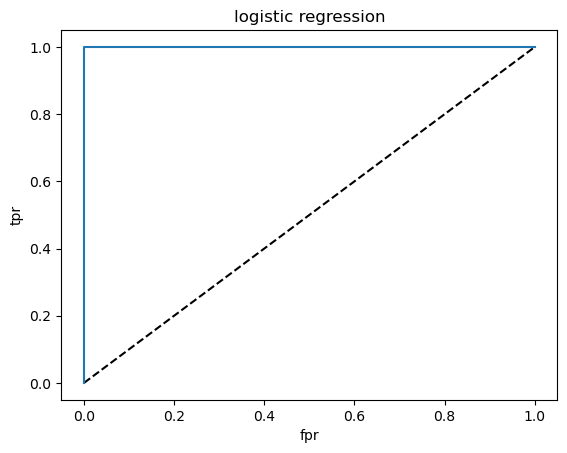

In [78]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('logistic regression') 
plt.show()         

In [79]:
dtc=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='random')

In [80]:
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
dtcpred_train=dtc.predict(x_train)
print("accuracy score:",accuracy_score(y_test,dtcpred))
print("accuracy score on training:",accuracy_score(y_train,dtcpred_train))
print("confusion matrix:",confusion_matrix(y_test,dtcpred))
print("classification report:",classification_report(y_test,dtcpred))

accuracy score: 0.9666666666666667
accuracy score on training: 0.9666666666666667
confusion matrix: [[30  1]
 [ 1 28]]
classification report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.97      0.97      0.97        29

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [81]:
print(dtcpred)

[0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1]


In [82]:
print(dtcpred_train)

[0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0
 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1
 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1]


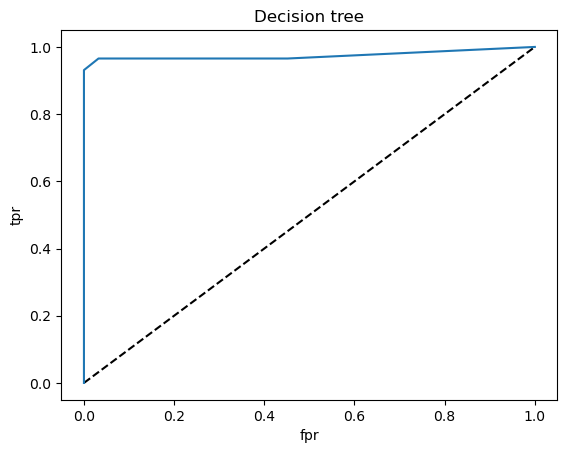

In [83]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('Decision tree') 
plt.show()         

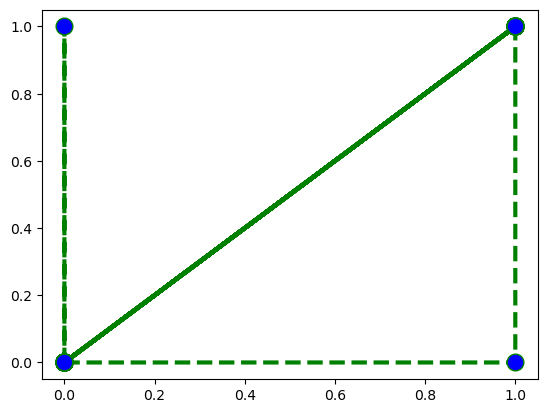

In [84]:

plt.plot(dtcpred, y_test, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
  

In [85]:
# use hyper parametric tunning
from sklearn.model_selection import GridSearchCV

In [86]:
svc=SVC()
estimators={'kernel':['rbf','poly','linear'],'C':[1,10]}

In [87]:
gsv=GridSearchCV(estimator=svc,param_grid=estimators)
gsv.fit(x,y)
print(gsv.best_params_)
print(gsv.best_score_)
print(gsv.best_estimator_)

{'C': 1, 'kernel': 'rbf'}
0.9800000000000001
SVC(C=1)


In [88]:
svm=SVC(kernel='rbf',C=1,gamma='auto')
svm.fit(x_train,y_train)
svmpred=svm.predict(x_test)
svmpred_train=svm.predict(x_train)
print("accuracy score:",accuracy_score(y_test,svmpred))
print("accuracy score on training:",accuracy_score(y_train,svmpred_train))
print("confusion matrix:",confusion_matrix(y_test,svmpred))
print("classification report:",classification_report(y_test,svmpred))

accuracy score: 1.0
accuracy score on training: 0.9791666666666666
confusion matrix: [[31  0]
 [ 0 29]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [89]:
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [90]:
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
knnpred_train=knn.predict(x_train)
print("accuracy score:",accuracy_score(y_test,knnpred))
print("accuracy score on training:",accuracy_score(y_train,knnpred_train))
print("confusion matrix:",confusion_matrix(y_test,knnpred))
print("classification report:",classification_report(y_test,knnpred))

accuracy score: 1.0
accuracy score on training: 0.9791666666666666
confusion matrix: [[31  0]
 [ 0 29]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [91]:
gnb.fit(x_train,y_train)
gnbpred=gnb.predict(x_test)
gnbpred_train=gnb.predict(x_train)
print("accuracy score:",accuracy_score(y_test,gnbpred))
print("accuracy score on training:",accuracy_score(y_train,gnbpred_train))
print("confusion matrix:",confusion_matrix(y_test,gnbpred))
print("classification report:",classification_report(y_test,gnbpred))

accuracy score: 0.9166666666666666
accuracy score on training: 0.9083333333333333
confusion matrix: [[27  4]
 [ 1 28]]
classification report:               precision    recall  f1-score   support

           0       0.96      0.87      0.92        31
           1       0.88      0.97      0.92        29

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [92]:
# Apply Ensemble Technique
forest=RandomForestClassifier()

In [93]:
forest.fit(x_train,y_train)
forestpred=forest.predict(x_test)
forestpred_train=forest.predict(x_train)
print("accuracy score:",accuracy_score(y_test,forestpred))
print("accuracy score on training:",accuracy_score(y_train,forestpred_train))
print("confusion matrix:",confusion_matrix(y_test,forestpred))
print("classification report:",classification_report(y_test,forestpred))

accuracy score: 1.0
accuracy score on training: 1.0
confusion matrix: [[31  0]
 [ 0 29]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [94]:
# Boosting
ada=AdaBoostClassifier()

In [95]:
ada.fit(x_train,y_train)
adapred=ada.predict(x_test)
adapred_train=ada.predict(x_train)
print("accuracy score:",accuracy_score(y_test,adapred))
print("accuracy score on training:",accuracy_score(y_train,adapred_train))
print("confusion matrix:",confusion_matrix(y_test,adapred))
print("classification report:",classification_report(y_test,adapred))

accuracy score: 1.0
accuracy score on training: 1.0
confusion matrix: [[31  0]
 [ 0 29]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



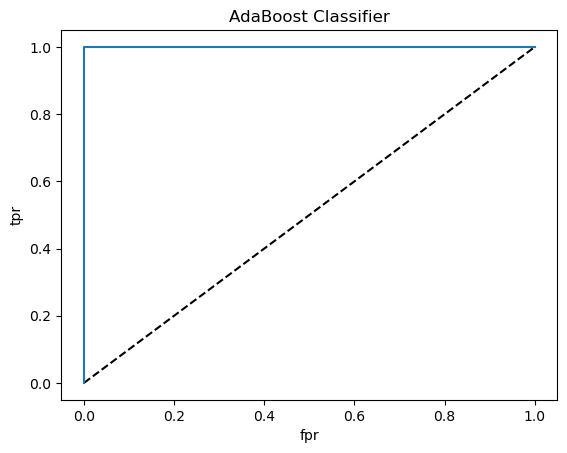

In [96]:
y1_pred_prob=ada.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y1_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('AdaBoost Classifier') 
plt.show()         

In [97]:
auc_score=roc_auc_score(y_test,ada.predict(x_test))

In [98]:
auc_score

1.0

Text(0, 0.5, 'predicted valur')

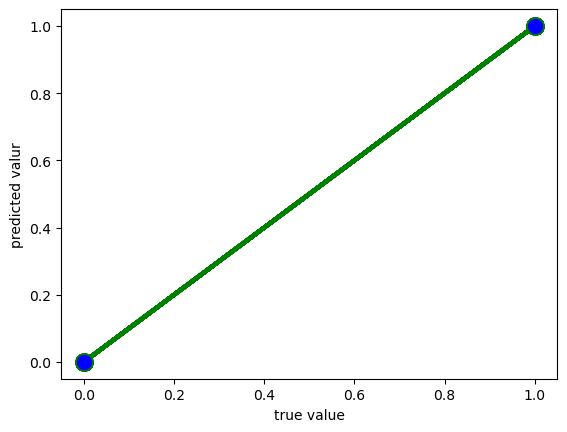

In [99]:
plt.plot(y_test,adapred,label='line 2',color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel('true value')
plt.ylabel('predicted valur')


In [100]:
gbr=GradientBoostingClassifier()

In [101]:
gbr.fit(x_train,y_train)
gbrpred=gbr.predict(x_test)
gbrpred_train=gbr.predict(x_train)
print("accuracy score:",accuracy_score(y_test,gbrpred))
print("accuracy score on training:",accuracy_score(y_train,gbrpred_train))
print("confusion matrix:",confusion_matrix(y_test,gbrpred))
print("classification report:",classification_report(y_test,gbrpred))

accuracy score: 1.0
accuracy score on training: 1.0
confusion matrix: [[31  0]
 [ 0 29]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
score=cross_val_score(gbr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.98333333 0.98333333 1.         0.9        1.        ]
0.9733333333333334
0.037416573867739396


In [104]:
score1=cross_val_score(ada,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

[0.96666667 0.98333333 0.98333333 0.9        1.        ]
0.9666666666666666
0.034960294939005036


In [105]:
score2=cross_val_score(forest,x,y,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

[1.         1.         0.98333333 0.9        1.        ]
0.9766666666666666
0.038873012632301994


In [106]:
score3=cross_val_score(svm,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

[1.  1.  1.  0.9 1. ]
0.9800000000000001
0.039999999999999994


In [107]:
score4=cross_val_score(dtc,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

[0.96666667 0.96666667 0.98333333 0.81666667 0.98333333]
0.9433333333333334
0.06377042156569664


In [108]:
score5=cross_val_score(knn,x,y,cv=5)
print(score5)
print(score5.mean())
print(score5.std())

[0.98333333 1.         1.         0.91666667 0.98333333]
0.9766666666666666
0.030912061651652355


In [109]:
score6=cross_val_score(lg,x,y,cv=5)
print(score6)
print(score6.mean())
print(score6.std())

[0.98333333 0.98333333 0.93333333 0.9        0.98333333]
0.9566666666666667
0.0343187671366233


cv score is high is random forest model

In [110]:
import pickle
filename="RandomForestClassifierClassifier.pkl"
pickle.dump(gbr,open(filename,'wb'))

load_model=pickle.load(open(filename,'rb'))
load_model.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [111]:
conculusion=pd.DataFrame([load_model.predict(x_test)[:],(y_test)[:]],index=["Predicted","Original"])
conculusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,0,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,1,1,0,1
Original,0,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,0,1,1,0,1


In [112]:
def predval(p):
    p=p.reshape(1,-1)
    print(p.shape)
    predvalue=forest.predict(p)
    print(predvalue)
    